In [1]:
##Hardware
import torch
if torch.cuda.is_available() == True:
  device = 'cuda'
  templist = [1,2,3]
  templist = torch.FloatTensor(templist).to(device)
  print("Cuda torch working : ",end="")
  print(templist.is_cuda)
  print("current device no. : ",end="")
  print(torch.cuda.current_device())
  print("GPU device count : ",end="")
  print(torch.cuda.device_count())
  print("GPU name : ",end="")
  print(torch.cuda.get_device_name(0))
  print("device : ",device)
  ! nvidia-smi
elif torch.backends.mps.is_available() == True:
  print("Apple device detected\nActivating Apple Silicon GPU")
  device = torch.device("mps")
else:
  print("cant use gpu , activating cpu")
  device = 'cpu'

Apple device detected
Activating Apple Silicon GPU


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [3]:
# Load the CIFAR-10 dataset
num_subprocesses = 8

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                        shuffle=True, num_workers=num_subprocesses)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000,
                                        shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
len(testset)

10000

In [5]:
 # CNN with 3 layer
# Define the CNN model
class CNN3(nn.Module):
    def __init__(self,dropout_rate = 0.1):
        super(CNN3, self).__init__()
        self.dropout_rate = dropout_rate
        self.conv1 = nn.Conv2d(in_channels = 3,out_channels= 6,kernel_size= 5)
        self.pool = nn.MaxPool2d(kernel_size= 2,stride= 2)
        self.conv2 = nn.Conv2d(in_channels= 6,out_channels= 16,kernel_size= 5)
        self.fc1 = nn.Linear(in_features= 16 * 5 * 5,out_features= 120)
        self.fc2 = nn.Linear(in_features= 120,out_features= 84)
        self.fc3 = nn.Linear(in_features= 84,out_features= 10)
        
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
CNN3 = CNN3

In [6]:
#CNN with 5layer


class CNN5(nn.Module):
    def __init__(self):
        super(CNN5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(512*1*1, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

CNN5 = CNN5

In [7]:
#CNN with 5 layer + dropout

import torch.nn as nn
class CNN5DROP(nn.Module):
    def __init__(self,dropout_rate = 0.1):
        super(CNN5DROP,self).__init__()
        self.dropout_rate = dropout_rate
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,96,2,1,0),
            nn.ReLU(),
            nn.MaxPool2d(2,1)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(96,256,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(3,2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(256,384,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(3,1,1)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(384,384,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(3,1,1)
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(384,256,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(3,2)
        )
        
        self.f1 = nn.Linear(256*6*6,4096)
        self.f2 = nn.Linear(4096,4096)
        self.f3 = nn.Linear(4096,10)
        
    def forward(self,x):
        out = self.layer1(x)
        #print(out.shape)
        out = self.layer2(out)
        #print(out.shape)
        out = self.layer3(out)
        #print(out.shape)
        out = self.layer4(out)
        #print(out.shape)
        out = self.layer5(out)
        #print(out.shape)
        out = out.view(out.size(0),-1)
        #out = out.view(-1,256*6*6)
        out = nn.functional.relu(self.f1(out))
        out = nn.functional.dropout(out,self.dropout_rate)
        out = nn.functional.relu(self.f2(out))
        out = nn.functional.dropout(out,self.dropout_rate)
        out = self.f3(out)
        out = nn.functional.log_softmax(out,dim=1)
        
        return out
    
CNN5DROP = CNN5DROP().to(device)

#Accuracy of the net on the test set: 82.27%

In [8]:
#This model cant learn




class CNN10(nn.Module):
    def __init__(self):
        super(CNN10, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=2, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1),
            nn.Dropout(0.25)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(0.25)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.25)
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.25)
        )
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(0.25)
        )
        
        self.layer6 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.25)
        )
        
        self.layer7 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.25)
        )
        
        self.layer8 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(0.25)
        )
        
        self.layer9 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5)
        )
        self.layer10 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10),
            nn.Softmax(dim=1)
        )
        
    def forward(self, x):
        x = self.layer1(x)
        #print(x.shape)
        x = self.layer2(x)
        #print(x.shape)
        x = self.layer3(x)
        #print(x.shape)
        x = self.layer4(x)
        #print(x.shape)
        x = self.layer5(x)
        #print(x.shape)
        x = self.layer6(x)
        #print(x.shape)
        x = self.layer7(x)
        #print(x.shape)
        x = self.layer8(x)
        #print(x.shape)
        x = self.layer9(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        x = self.layer10(x)
        
        return x
        
CNN10 = CNN10

In [9]:
### VARIABLE ###
import itertools
import matplotlib.pyplot as plt
from tqdm import tqdm
#lr_list = [100000,10000,1000,100,10,1,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
lr_list = [1e-1,1e-2,1e-3,1e-6]

opt_momentum = 0.9
nb_epoch = 10
dprate = 0.1
# Setup
# Setup models dictionary
models = {'CNN3': CNN3(), 'CNN5': CNN5(), 'CNN10': CNN10()}
optimizers = {'SGD': optim.SGD}
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.to(device)
    for opt_name, opt_func in optimizers.items():
        for LR in lr_list:
            optimizer = opt_func(model.parameters(), lr=LR, momentum=opt_momentum if opt_name == 'SGD' else None)
            criterion = nn.CrossEntropyLoss().to(device)
            losses = []
            total_correct = 0
            total_images = 0

            for epoch in tqdm(range(nb_epoch), desc=f"{model_name}-{opt_name}-LR{LR}"):
                model.train()  # Set model to training mode
                running_loss = 0.0
                correct = 0
                total = 0

                for i, data in enumerate(trainloader, 0):
                    inputs, labels = data[0].to(device), data[1].to(device)
                    optimizer.zero_grad()

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    running_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                avg_loss = running_loss / len(trainloader)
                losses.append(avg_loss)
                accuracy = 100 * correct / total
                total_correct += correct
                total_images += total

            final_accuracy = 100 * total_correct / total_images
            print(f"Model: {model_name}, Optimizer: {opt_name}, LR: {LR}, Final Loss: {avg_loss:.4f}, Accuracy: {final_accuracy:.4f}%")

            # Plot
            plt.plot(losses, label=f'{model_name}-{opt_name}-LR{LR}', color=next(colors))

plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 78

CNN3-SGD-LR0.1: 100%|██████████| 10/10 [09:35<00:00, 57.56s/it]


Model: CNN3, Optimizer: SGD, LR: 0.1, Final Loss: 1.5072, Accuracy: 46.5416%


CNN3-SGD-LR0.01: 100%|██████████| 10/10 [09:24<00:00, 56.48s/it]


Model: CNN3, Optimizer: SGD, LR: 0.01, Final Loss: 0.8654, Accuracy: 64.6184%


CNN3-SGD-LR0.001: 100%|██████████| 10/10 [29:36<00:00, 177.67s/it] 


Model: CNN3, Optimizer: SGD, LR: 0.001, Final Loss: 0.7741, Accuracy: 71.2538%


CNN3-SGD-LR1e-06: 100%|██████████| 10/10 [26:03<00:00, 156.35s/it]


Model: CNN3, Optimizer: SGD, LR: 1e-06, Final Loss: 0.7670, Accuracy: 72.0892%


CNN5-SGD-LR0.1: 100%|██████████| 10/10 [10:44<00:00, 64.48s/it]


Model: CNN5, Optimizer: SGD, LR: 0.1, Final Loss: 0.4084, Accuracy: 64.8690%


CNN5-SGD-LR0.01: 100%|██████████| 10/10 [10:45<00:00, 64.52s/it]


Model: CNN5, Optimizer: SGD, LR: 0.01, Final Loss: 0.0226, Accuracy: 97.7222%


CNN5-SGD-LR0.001: 100%|██████████| 10/10 [10:45<00:00, 64.55s/it]


Model: CNN5, Optimizer: SGD, LR: 0.001, Final Loss: 0.0125, Accuracy: 99.8584%


CNN5-SGD-LR1e-06: 100%|██████████| 10/10 [10:46<00:00, 64.60s/it]


Model: CNN5, Optimizer: SGD, LR: 1e-06, Final Loss: 0.0121, Accuracy: 99.8978%


CNN10-SGD-LR0.1: 100%|██████████| 10/10 [5:04:17<00:00, 1825.72s/it] 


Model: CNN10, Optimizer: SGD, LR: 0.1, Final Loss: 2.3026, Accuracy: 9.7494%


CNN10-SGD-LR0.01: 100%|██████████| 10/10 [1:06:18<00:00, 397.83s/it]


Model: CNN10, Optimizer: SGD, LR: 0.01, Final Loss: 2.3026, Accuracy: 9.8794%


CNN10-SGD-LR0.001:  30%|███       | 3/10 [17:26<40:55, 350.78s/it]

#### Cost by LR  
1000 nan  
100 nan  
10 nan  
1 nan  
0.1 1.4555832147598267  
#### 0.01 0.8523364067077637  
0.001 1.3504940271377563  
0.0001 2.3020293712615967  
1e-05 2.3091320991516113  
1e-06 2.307286024093628  

transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) normalizes the data to have a mean of 0.5 and a standard deviation of 0.5.  
This is a common preprocessing step in deep learning, as it helps improve model performance and prevent overfitting.  

In [ ]:
#if there is a CUDA memeory error, change the batch size(reduce it)
net.eval()

# Calculate the accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print("Accuracy of the net on the test set: {}%".format(accuracy))


Accuracy of the net on the test set: 82.2%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_of_examples = 10 #only even numbers (please)
num_cols = 2
num_rows = int(num_of_examples/num_cols)

print("showing at least %s of the errors"%num_of_examples)

def imshow(img):
	img = img / 2 + 0.5 # unnormalize
	npimg = img.cpu().numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))#rearranges the dimensions of the image array from (C, H, W) (color channel, height, width) to (H, W, C)
	plt.axis('off')

wrong_images = []
wrong_preds = []
wrong_labels = []
#image list of the CIFAR-10 in text
img_list = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
cnt = 0
with torch.no_grad():
	for data in testloader:
		inputs, labels = data
		inputs, labels = inputs.to(device), labels.to(device)
		outputs = net(inputs)
		_, predicted = torch.max(outputs.data, 1)
		cnt = cnt + 1
# Store the wrongly guessed images, predictions, and actual answers
for i, (p, l) in enumerate(zip(predicted, labels)):
	if p != l:
		wrong_images.append(inputs[i])
		wrong_preds.append(p.item())
		wrong_labels.append(l.item())


showing at least 10 of the errors


In [ ]:
testloader.batch_size

1000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

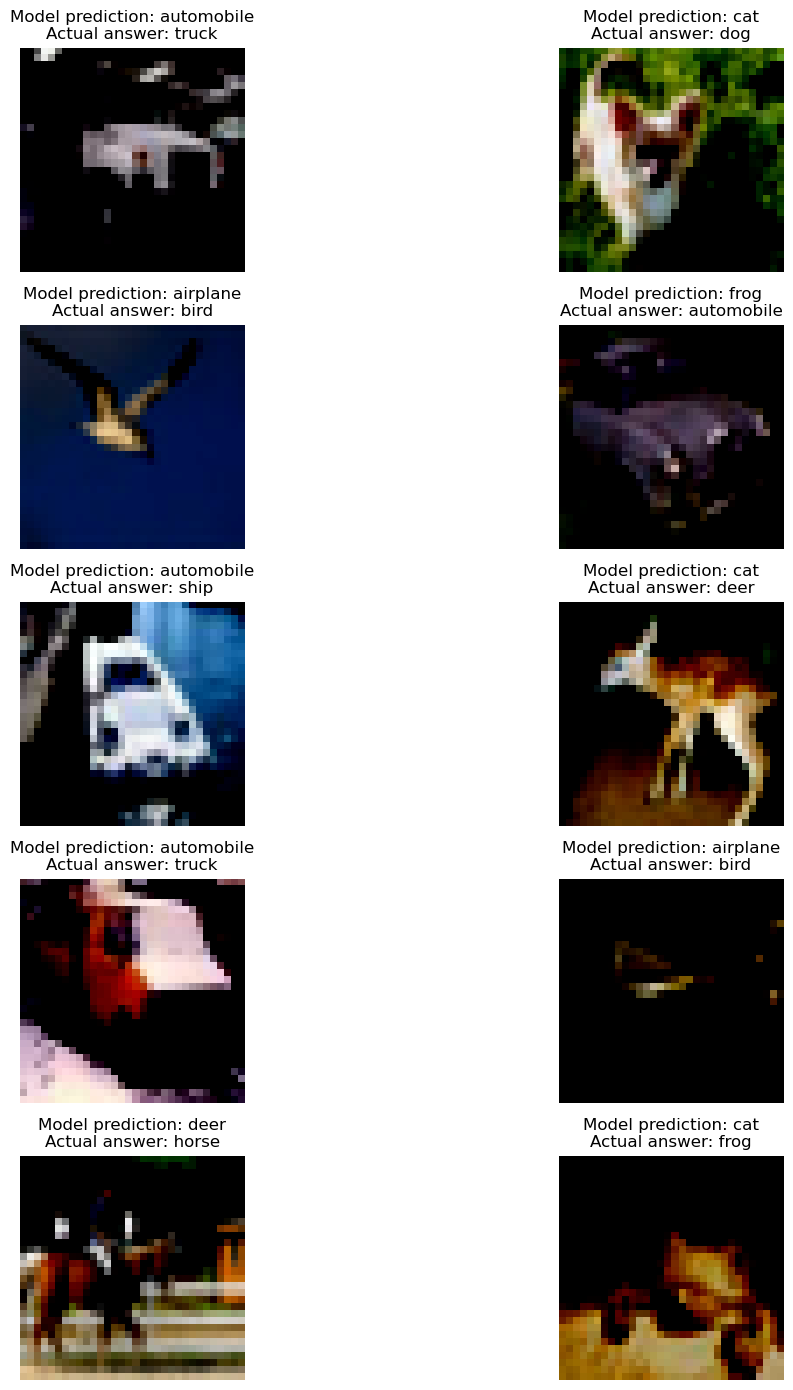

In [ ]:
import random
fig, ax = plt.subplots(num_rows, num_cols, figsize=(14, 14))

for i, (img, p, l) in enumerate(zip(wrong_images, wrong_preds, wrong_labels)):
	num = random.randrange(0,len(wrong_images))
	img , p , l = wrong_images[num], wrong_preds[num], wrong_labels[num]
	r = i // num_cols
	c = i % num_cols
	try:
		ax[r, c].imshow(np.transpose(torchvision.utils.make_grid(img).to('cpu').numpy(), (1, 2, 0)))
		ax[r, c].set_title("Model prediction: {}\nActual answer: {}".format(img_list[p], img_list[l]))
		ax[r, c].axis('off')
	except:
		break
	if i > num_of_examples: #print only 10
		break
plt.tight_layout()
plt.show()